<div style="background-color: #424449; padding: 30px; text-align: center; font-size: 36px; font-weight: bold;">
  <span style="color: #caccd1;">1. Análise Exploratória</span>
</div>

In [1]:
# Configurações de visualização
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Importação das Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from matplotlib import cm
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')
# Configurações de visualização do dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

In [2]:
# Carregamento dos dados em arquivo csv
df = pd.read_csv('CC GENERAL.csv')

**Dicioário dos Dados:**

- **CAST_ID** - Identificação do titular do cartão de crédito

- **BALANCE** - Valor do saldo do cartão de crédito

- **BALANCE_FREQUENCY** - Com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)

- **PURCHASES** - Valor das compras feitas na conta

- **ONEOFF_PURCHASES** - Valor máximo de compra feitas de uma só vez

- **INSTALLMENTS_PURCHASES** - Valor da compra parcelada

- **CASH_ADVANCE** - Dinheiro adiantado dado ao usuário

- **PURCHASES_FREQUENCY** - Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = compra frequentemente, 0 = não compra com frequência)

- **ONEOFF_PURCHASES_FREQUENCY** -  Com que frequência as compras acontecem de uma só vez (1 = comprado com frequência, 0 = comprado sem frequência)

- **PURCHASES_INSTALLMENTS_FREQUENCY** - Com que frequência as compras parceladas estão sendo feitas (1 = frequentemente feito, 0 = não feito com frequência)

- **CASH_ADVANCE_FREQUENCY** - Com que frequência o adiantamento em dinheiro está sendo realizado

- **CASH_ADVANCE_TRX** - Quantidade de transações realizadas com Dinheiro Antecipado

- **PURCHASES_TRX** - Número de transações de compras feitas

- **CREDIT_LIMIT** - Limite de cartão de crédito para o usuário 

- **PAYMENTS** - Valor do pagamento feito pelo usuário

- **MINIMUM_PAYMENTS** - Valor mínimo de pagamentos feitos pelo usuário

- **PRC_FULL_PAYMENT** - Porcentagem do pagamento integral pago pelo usuário

- **TENURE** - Detenção do serviço de cartão de crédito do usuário

In [3]:
# Visualização do DataFrame
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4140,C14256,18495.558550,1.000000,5288.28,3657.30,1630.98,0.000000,1.000000,0.583333,1.0,0.000000,0,76,22000.0,4246.168346,4227.081580,0.0,12
7519,C17722,510.953138,1.000000,172.41,172.41,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,4,1200.0,959.003305,242.770679,0.0,12
3077,C13166,1293.044047,1.000000,0.00,0.00,0.00,1425.748356,0.000000,0.000000,0.0,0.333333,5,0,1500.0,294.307470,286.673785,0.0,12
1592,C11645,1.600479,0.181818,513.24,0.00,513.24,0.000000,1.000000,0.000000,1.0,0.000000,0,12,2500.0,363.735397,NaN,0.0,12
4064,C14180,1325.445684,0.818182,0.00,0.00,0.00,1895.470431,0.000000,0.000000,0.0,0.083333,1,0,4500.0,187.108587,566.078539,0.0,12


In [4]:
# Colunas
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
# Tamanho do Dataset
df.shape

(8950, 18)

In [6]:
# Informações gerais sobre as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Tipos de dados do Dataset
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
# Valores únicos em cada coluna
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [9]:
# Descrição estatística do Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [10]:
# Campos duplicados
df.duplicated().sum()

0

In [11]:
# Valores nulos no Dataset
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

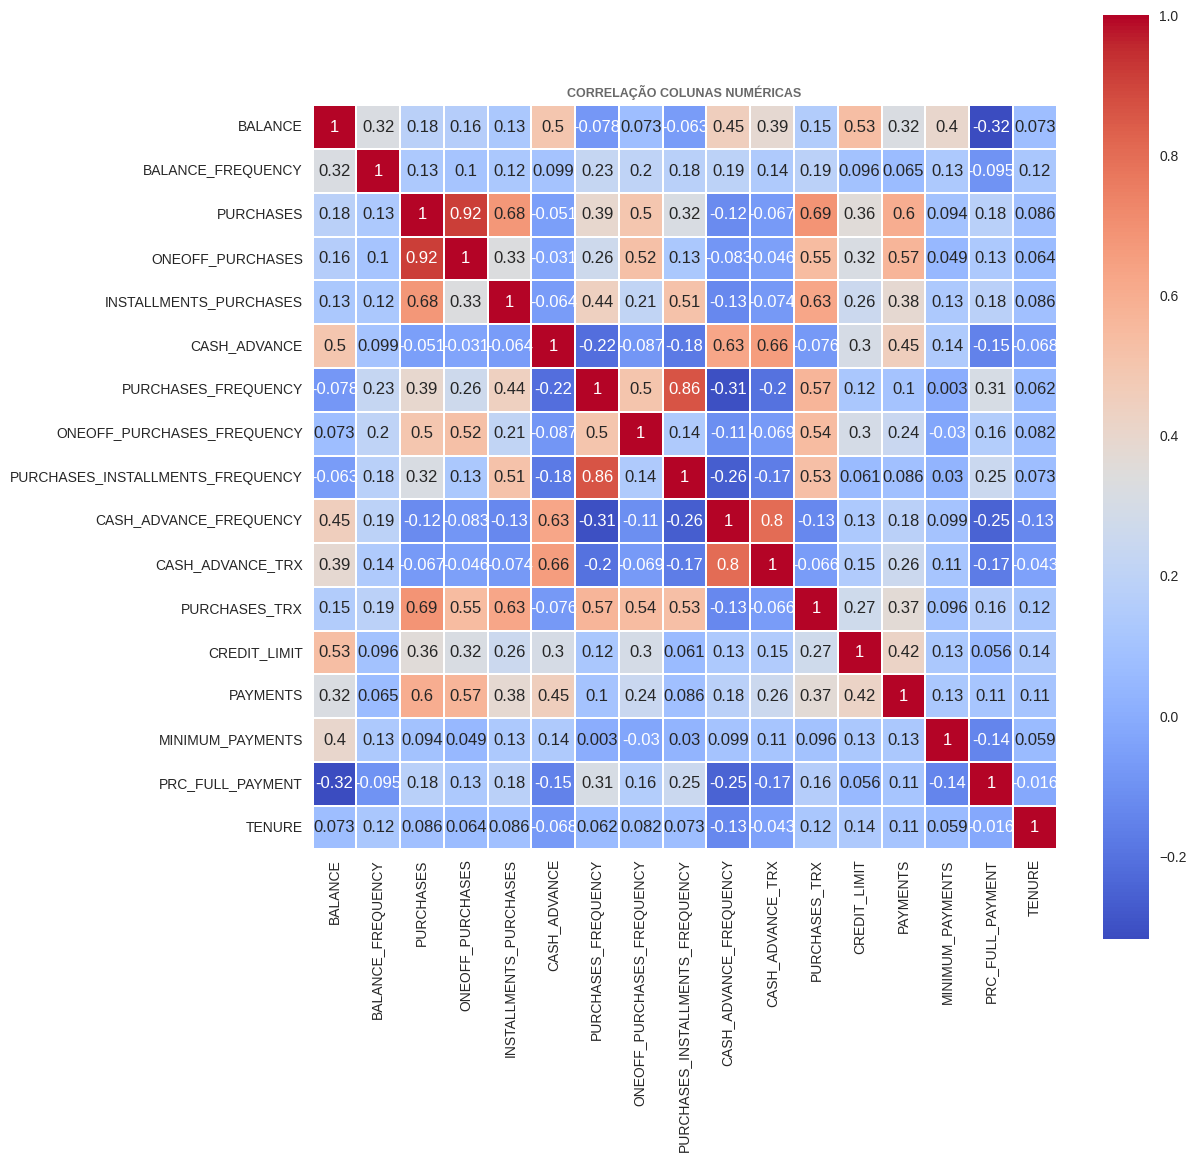

In [12]:
# Correlação entre as colunas
plt.figure(figsize=(12,12)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);
plt.title('CORRELAÇÃO COLUNAS NUMÉRICAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.show();

In [13]:
# Listando as colunas numéricas
v_n = list(df.select_dtypes(include=['float64', 'int64']).columns)

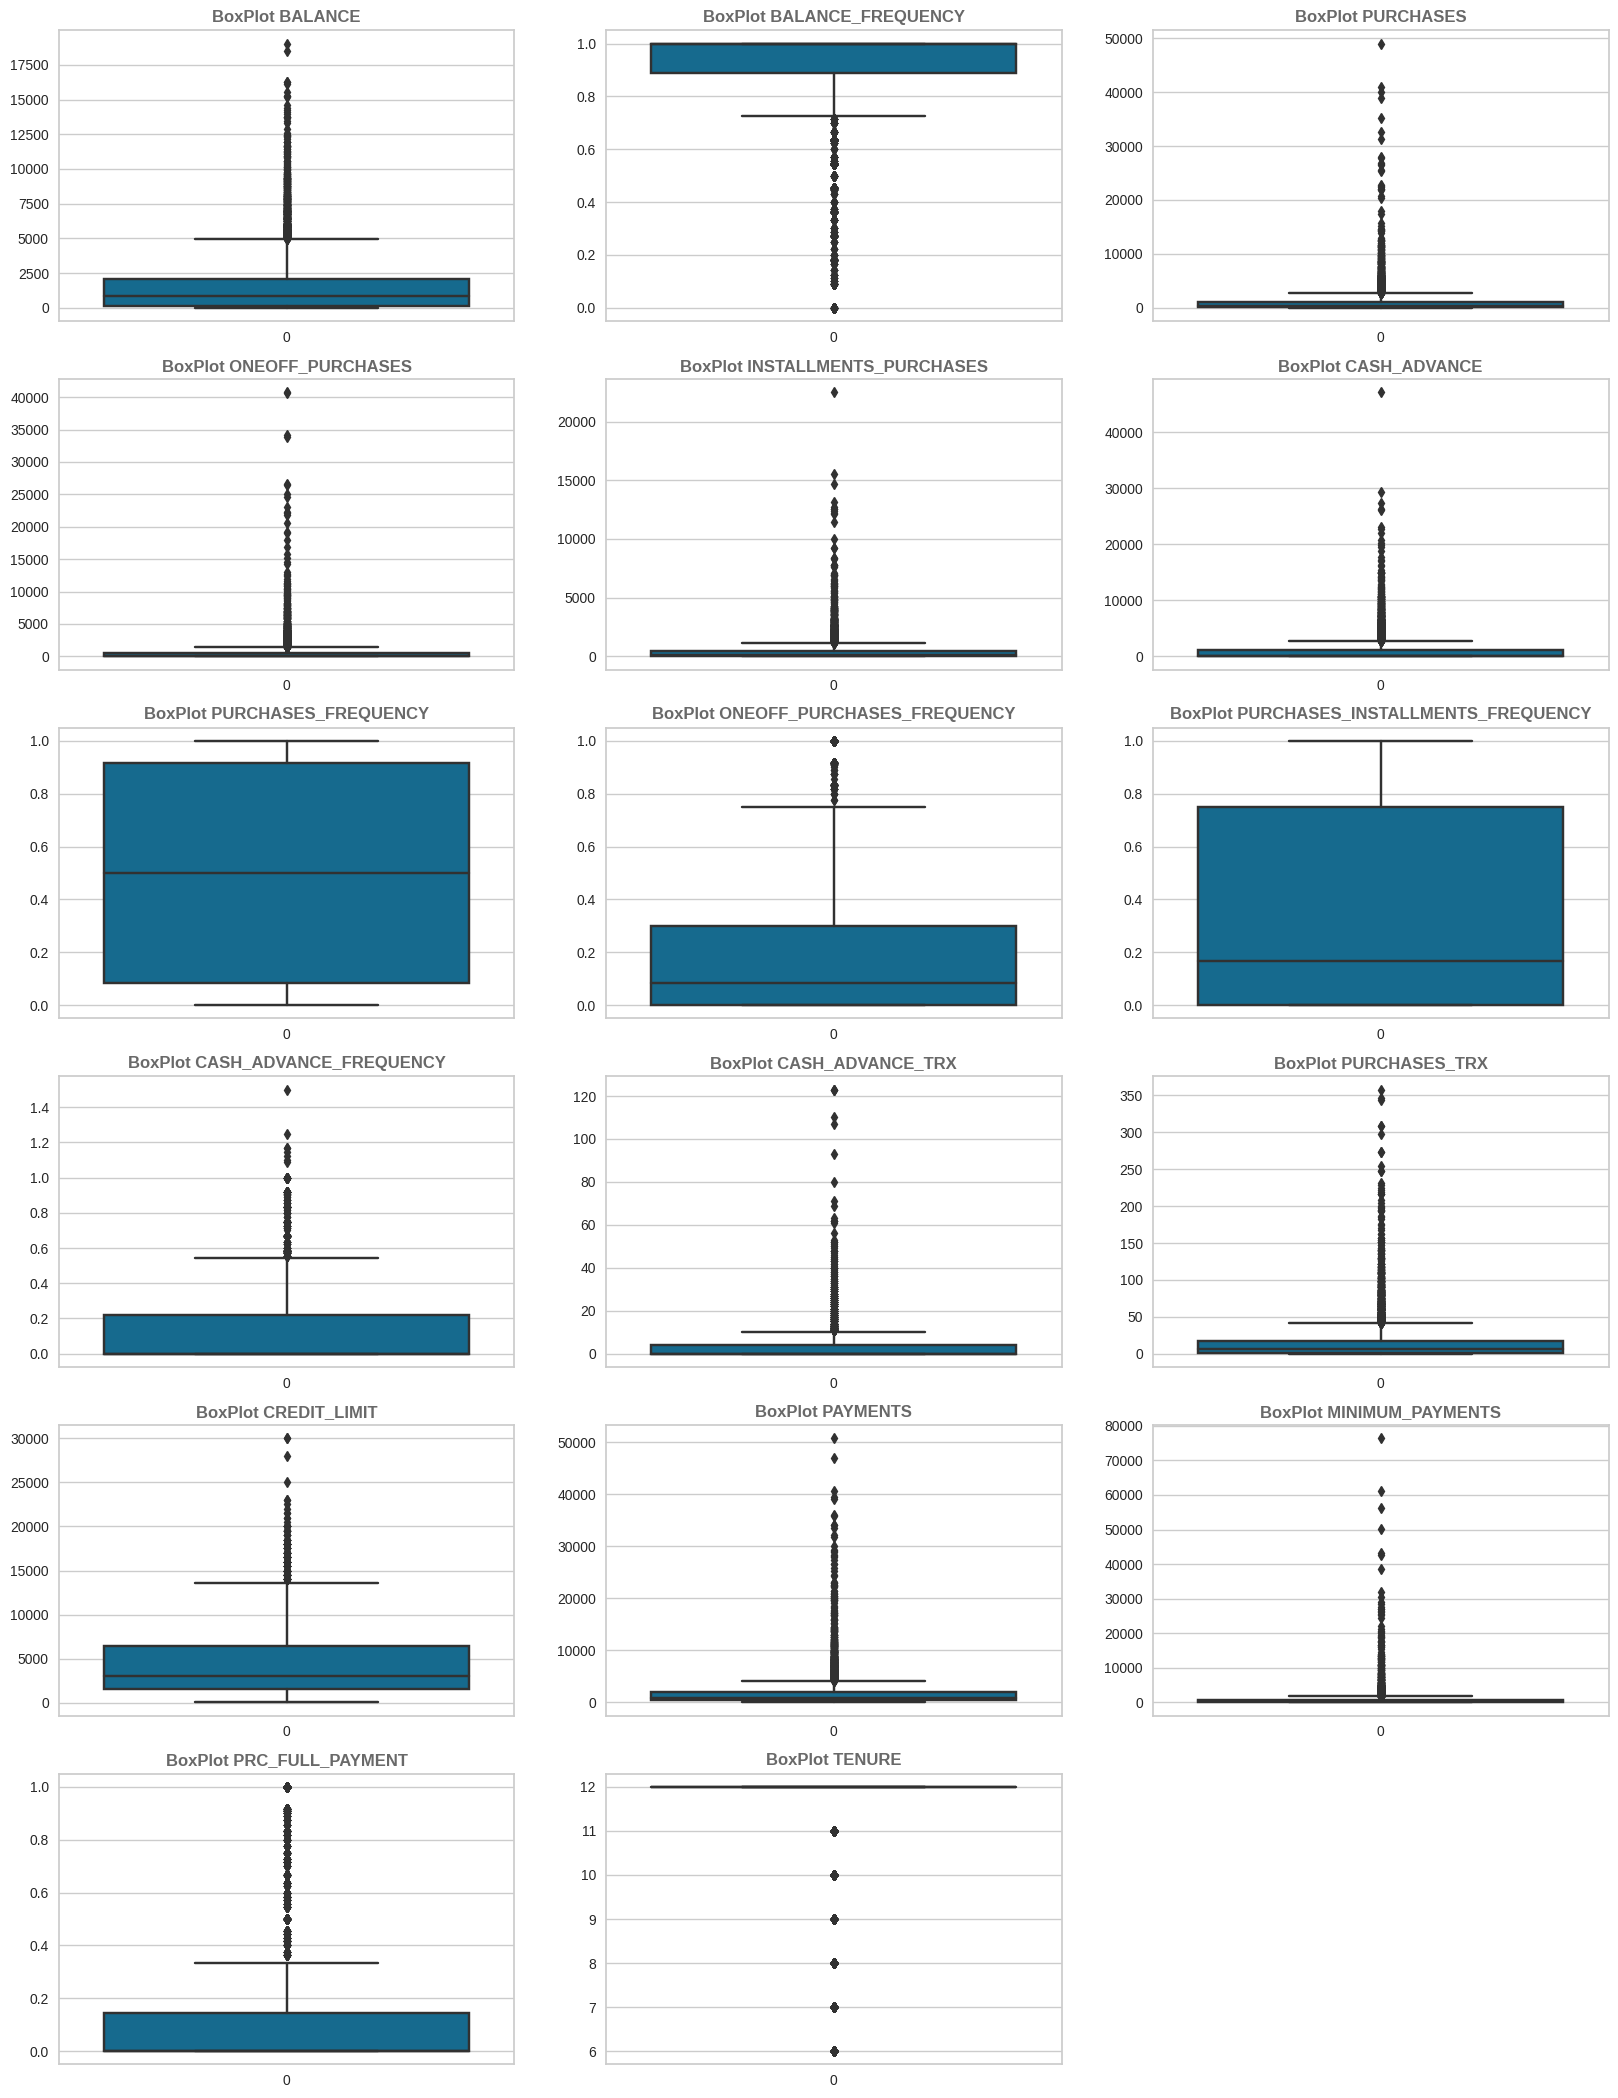

In [14]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(df[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

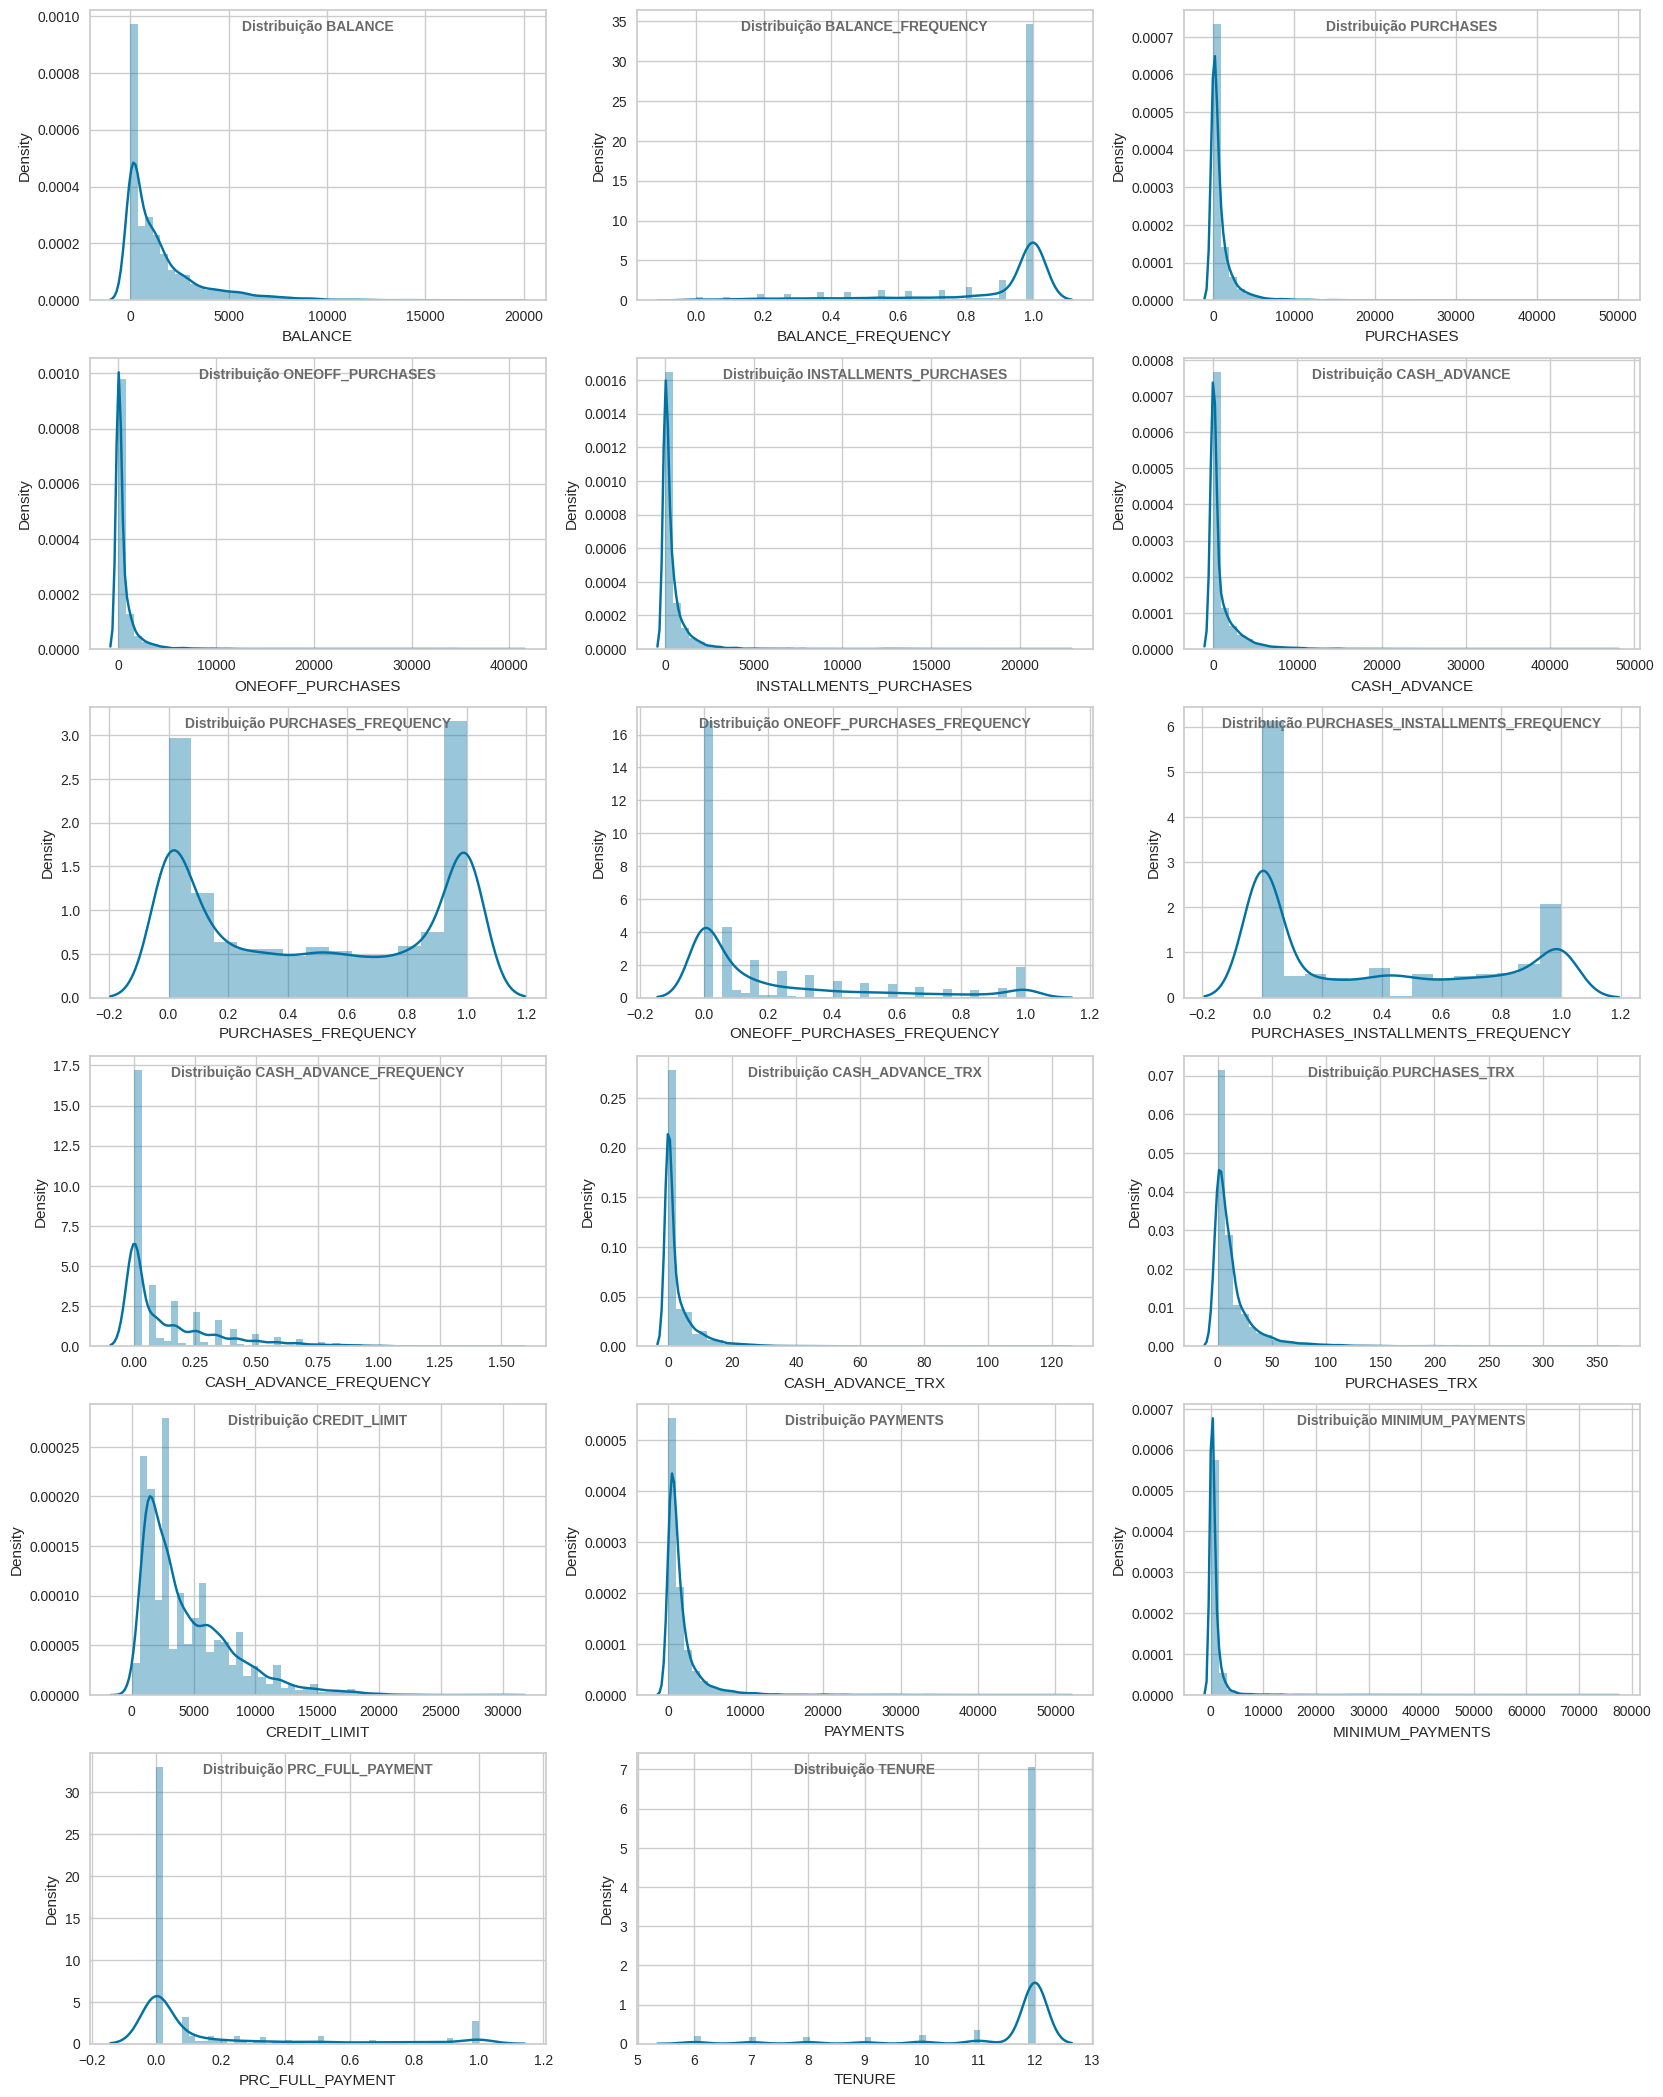

In [15]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(df[column])
    plt.title('Distribuição {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1